
NSL_KDD 主程式
python 3.5
Author:daniel-code
Date:2018.04.11


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time


         4      5   11   32
0       491      0   0   25
1       146      0   0    1
2         0      0   0   26
3       232   8153   1  255
4       199    420   1  255
5         0      0   0   19
6         0      0   0    9
7         0      0   0   15
8         0      0   0   23
9         0      0   0   13
10        0      0   0   12
11        0      0   0   13
12      287   2251   1  219
13      334      0   1   20
14        0      0   0    1
15        0      0   0    2
16      300  13788   1  255
17       18      0   0   16
18      233    616   1  255
19      343   1178   1  255
20        0      0   0   23
21        0      0   0   17
22      253  11905   1  255
23      147    105   0    1
24        0      0   0    2
25      437  14421   1   25
26        0      0   0   13
27      227   6588   1  255
28      215  10499   1  255
29      241   1400   1  255
...     ...    ...  ..  ...
25162   105    147   0   76
25163     0      0   0  136
25164   276    622   1  255
25165  2499   2737  

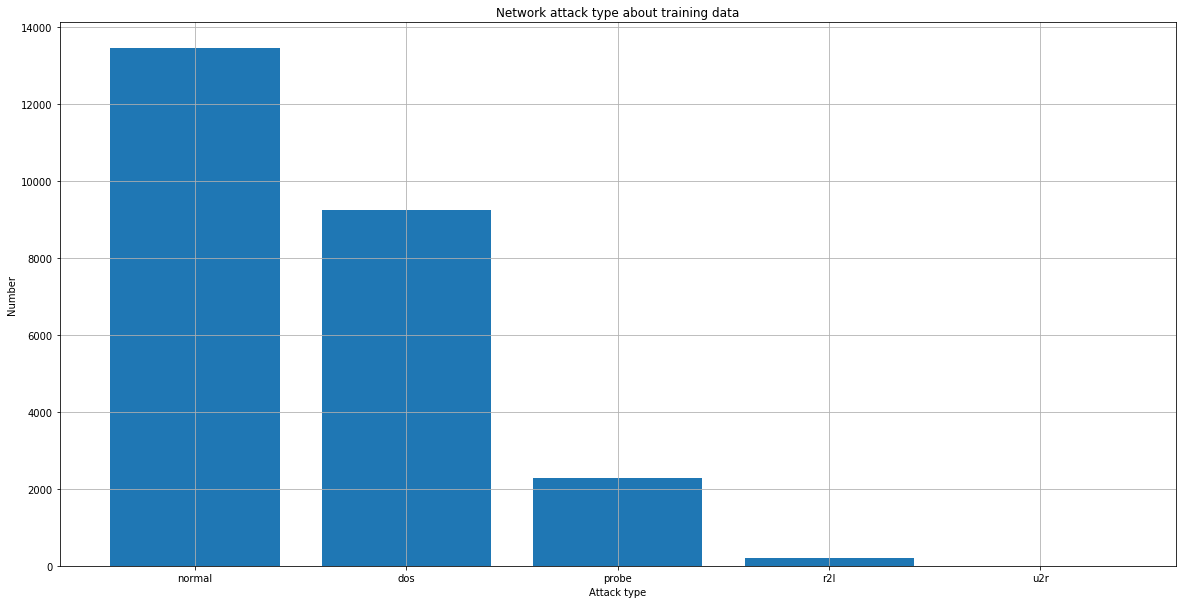

In [10]:
# read kdd date from csv


data = pd.read_csv('NSL_KDD/20_Percent Training_Set.csv', header=None)

# build attack table
attack_type = pd.read_csv('NSL_KDD/Attack Types 2.csv', names=['attack', 'type'])
attack_type_dict = attack_type.set_index('attack')['type'].to_dict()
# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x] if x in attack_type_dict else 'other')
#x = data.drop(columns=[1, 2, 3, 41])
x = data.iloc[:, [4, 5, 11, 32]]
print(x)
# statistics attack type
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type about training data')
plt.bar(range(len(sorted_hist_list[:, 0])), list(map(float, sorted_hist_list[:, 1])))
plt.xticks(range(len(sorted_hist_list[:, 0])), sorted_hist_list[:, 0])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()
x_train = np.array(x)
y_train = np.array(y)
# splite dataset into train and test set
#x_train, x_test, y_train, y_test = train_test_split(x[:, 4:], y, test_size=0.2, random_state=0)


Network attack type
normal 	 9710
dos 	 7478
r2l 	 2754
probe 	 2421
u2r 	 180

Total	 22543


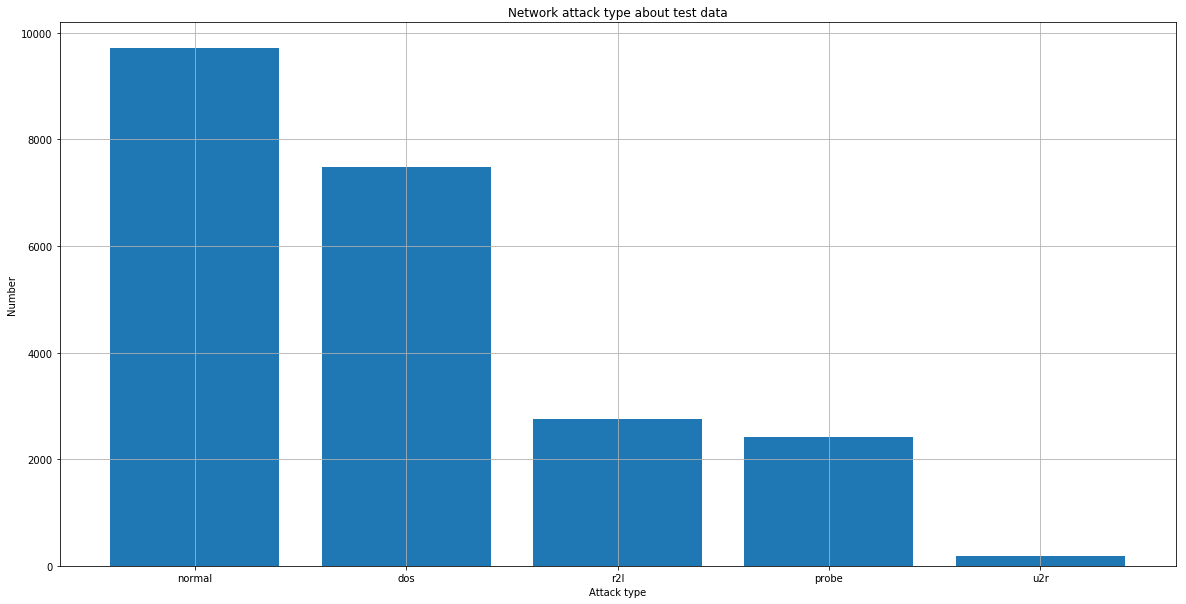

In [11]:
data = pd.read_csv('NSL_KDD/KDDTest+.csv', header=None)

# build attack table
#attack_type = pd.read_csv('NSL_KDD/Attack Types.csv', names=['attack', 'type'])
#attack_type_dict = attack_type.set_index('attack')['type'].to_dict()

# build training data and label
y = data[41].apply(lambda x:attack_type_dict[x]if x in attack_type_dict else 'other')
#x = data.drop(columns=[1, 2, 3, 41])
x = data.iloc[:, [4, 5, 11, 32]]
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type about test data')
plt.bar(range(len(sorted_hist_list[:,0])),list(map(float,sorted_hist_list[:, 1])))
plt.xticks(range(len(sorted_hist_list[:,0])),sorted_hist_list[:, 0])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()
x_test = np.array(x)
y_test = np.array(y)

In [12]:
# build model
model = svm.SVC()
print('---START TRAINING---')
start_time = time.time()
model.fit(X=x_train, y=y_train)
print('---END TRAIN---')
print('Time = ', time.time() - start_time)

---START TRAINING---


---END TRAIN---
Time =  59.716965675354004


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        dos       0.90      0.61      0.73      7478
     normal       0.60      0.98      0.74      9710
      probe       0.79      0.48      0.60      2421
        r2l       0.00      0.00      0.00      2754
        u2r       0.00      0.00      0.00       180

avg / total       0.64      0.68      0.63     22543



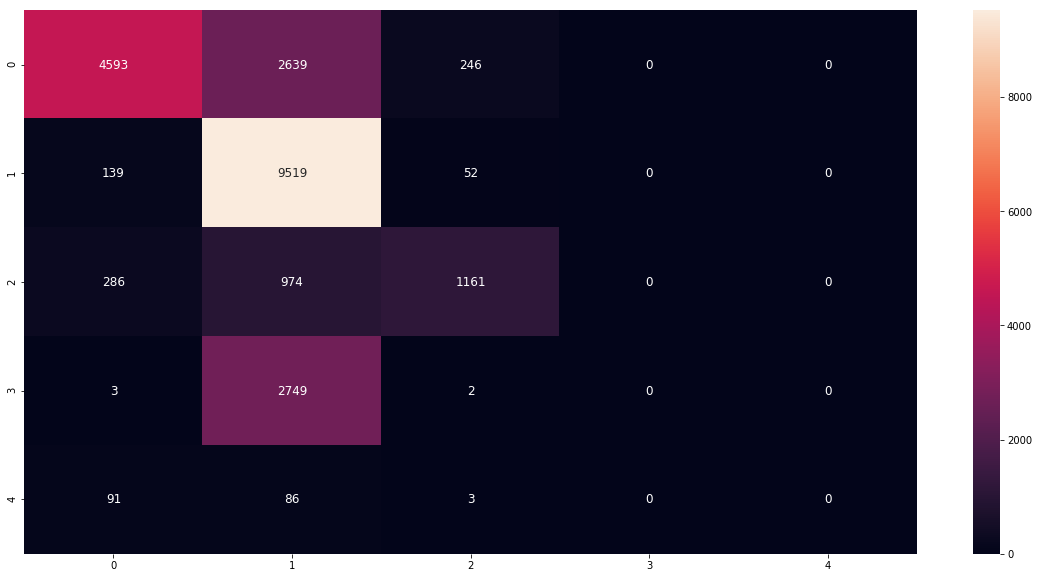

In [9]:
# predict
y_pred=model.predict(x_test)
score = model.score(X=x_test, y=y_test)
print(classification_report(y_test,y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,annot_kws={"size": 12}, ax = ax,fmt="d") #annot=True to annotate cells
plt.show()